<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>1. Import Libraries & Ingest Data</strong></h1>   
</div>

<h4>pip freeze</h4>

In [ ]:
%%writefile requirements.txt
transformers==4.28.1
scikit-plot==0.3.7
yellowbrick==1.5
ipywidgets==7.7.1
matplotlib-dashboard==0.0.4
seaborn==0.12.0
missingno==0.5.2
nltk==3.2.4
wordcloud==1.8.2.2
gensim==4.3.1


Writing requirements.txt


In [ ]:
import sys, platform
print("Python  :", sys.version)
print("Platform:", platform.platform())

!{sys.executable} -m pip install -Uq -r requirements.txt

Python  : 3.8.16 (default, Mar 23 2023, 17:40:49) 
[GCC 10.2.1 20210110]
Platform: Linux-5.4.88+-x86_64-with-glibc2.2.5
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


## Print Available Devices - 'TPU', 'GPU', 'CPU'.

In [ ]:
import tensorflow as tf
print("Tensorflow version \t\t:" + tf.__version__)

print("Available devices:")
for i, device in enumerate(tf.config.list_logical_devices()):
    print("%d) %s" % (i, device))

D0510 19:50:32.701590902      14 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0510 19:50:32.701620153      14 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0510 19:50:32.701623702      14 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0510 19:50:32.701626564      14 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0510 19:50:32.701628987      14 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0510 19:50:32.701632752      14 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0510 19:50:32.701635332      14 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0510 19:50:32.

Tensorflow version 		:2.12.0
Available devices:
0) LogicalDevice(name='/device:CPU:0', device_type='CPU')
1) LogicalDevice(name='/device:TPU_SYSTEM:0', device_type='TPU_SYSTEM')
2) LogicalDevice(name='/device:TPU:0', device_type='TPU')
3) LogicalDevice(name='/device:TPU:1', device_type='TPU')
4) LogicalDevice(name='/device:TPU:2', device_type='TPU')
5) LogicalDevice(name='/device:TPU:3', device_type='TPU')
6) LogicalDevice(name='/device:TPU:4', device_type='TPU')
7) LogicalDevice(name='/device:TPU:5', device_type='TPU')
8) LogicalDevice(name='/device:TPU:6', device_type='TPU')
9) LogicalDevice(name='/device:TPU:7', device_type='TPU')


## TPU, GPU or CPU Detection

In [ ]:
try:
    import tensorflow as tf
    gpus = None
    # resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
    # tf.config.experimental_connect_to_cluster(resolver)
    # tf.tpu.experimental.initialize_tpu_system(resolver)
    # strategy = tf.distribute.TPUStrategy(resolver)
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    strategy = tf.distribute.TPUStrategy(tpu)
    print('Running on TPU ', tpu.master(), len(tf.config.list_logical_devices('TPU')))

except Exception as e:

    gpus = tf.config.list_logical_devices('GPU')
    if len(gpus) > 1:
        strategy = tf.distribute.MirroredStrategy(devices=[f"/gpu:{gpu.name.split(':')[-1]}" for gpu in gpus])
        print('Running on multiple GPUs', [gpu.name for gpu in gpus])
    elif len(gpus) == 1:
        strategy = tf.distribute.get_strategy()
        print('Running on single GPU', gpus[0].name)
    else:
        strategy = tf.distribute.get_strategy()
        print('Running on CPU')

print("Number of accelerators: ", strategy.num_replicas_in_sync)

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU

## Mixed Precision Policy and Some Settings

In [ ]:
# tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True)))
# tf.config.set_soft_device_placement(True)
# tf.debugging.set_log_device_placement(True)
# assert tf.test.is_gpu_available()
# assert tf.test.is_built_with_cuda()
# strategy.experimental_enable_dynamic_batch_size = False


tf.compat.v1.enable_v2_behavior()
tf.config.optimizer.set_jit(True)



tf.config.threading.get_inter_op_parallelism_threads()

0

In [ ]:
# float32 or mixed_float16 (mixed precision: compute float16, variable float32)
# TPU is fast enough and has enough memory to use float32
# policy = tf.keras.mixed_precision.Policy('float32')
# tf.keras.mixed_precision.set_global_policy(policy)
print(f'Compute dtype : {tf.keras.mixed_precision.global_policy().compute_dtype}')
print(f'Variable dtype: {tf.keras.mixed_precision.global_policy().variable_dtype}')

Compute dtype : float32
Variable dtype: float32


In [ ]:

import tensorflow.python as tf_python

if gpus:
    print("changed shard policy...")
    tf.data.experimental.DistributeOptions.auto_shard_policy = tf_python.data.util.options.create_option(
        docstring="The type of sharding to use. See "
        "`tf.data.experimental.AutoShardPolicy` for additional information.",
        ty=tf.data.experimental.AutoShardPolicy,
        default_factory=lambda: tf.data.experimental.AutoShardPolicy.DATA,
        name="auto_shard_policy",
    )

# # way-2
# if isinstance(strategy, tf.distribute.MirroredStrategy):
#     # Shard Policy for GPU
#     options = tf.data.Options()
#     options.experimental_distribute.auto_shard_policy = tf.data.experimental.AutoShardPolicy.FILE
#     train_ds = train_ds.with_options(options)
#     print('Apply Shard Policy for GPU')

## Importing Related Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import missingno as msno
import scipy.stats as stats
from matplotlib_dashboard import MatplotlibDashboard

import re
import random
import string
import requests
import tempfile

from PIL import Image
from tqdm.notebook import tqdm
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")


import gc
gc.collect()

0

## Parameters

In [ ]:
BATCH_SIZE = 8 * strategy.num_replicas_in_sync
print('BATCH_SIZE           :', BATCH_SIZE)

random_state = 101

BATCH_SIZE           : 64


<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>2. Exploratory Data Analysis and Data Cleaning</strong></h1>   
</div>



In [ ]:
# df_original = pd.read_csv('/content/archive.zip', index_col=0)
df_original = pd.read_csv('/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv', index_col=0)
df = df_original.copy()
print('Shape of DataFrame: ',df.shape,'\n')
df

Shape of DataFrame:  (23486, 10) 



,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


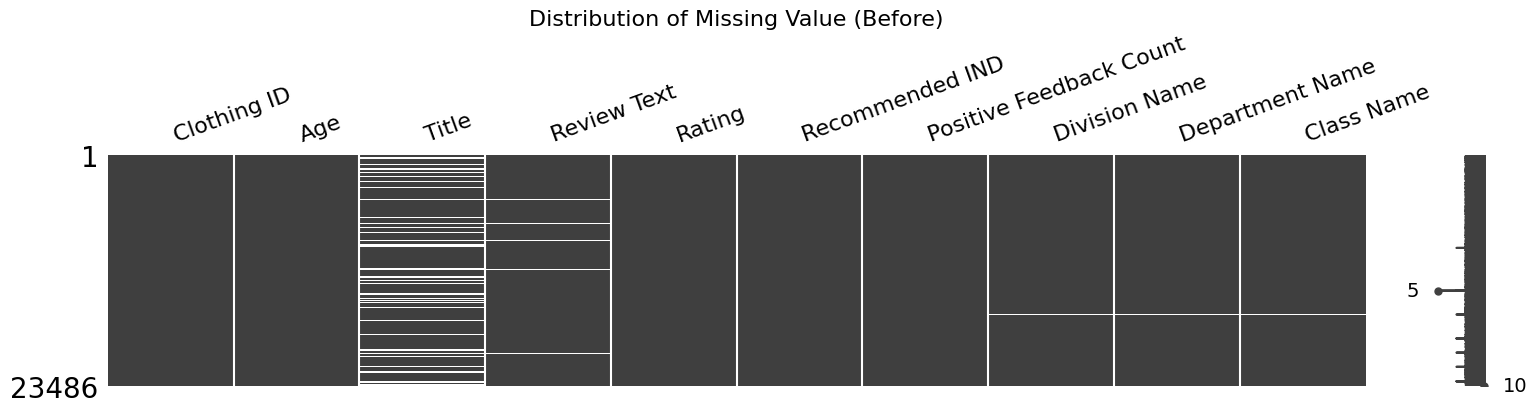

In [ ]:
msno.matrix(df, figsize=(18, 3), label_rotation=20,
           ).set_title('Distribution of Missing Value (Before)',fontsize=16);

In [ ]:
df.isna().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
df.drop(['Clothing ID'], axis=1, inplace=True)
df.dropna(subset=['Review Text','Division Name',], inplace=True)

df['Text']  = df['Title'].fillna('-') + ' ' + df['Review Text']
df.drop(['Title', 'Review Text', 'Division Name'],axis=1,inplace=True)

df['Text_Length'] = df['Text'].astype('str').apply(len)
df = df.reset_index(drop=True)

Shape of DataFrame:  (22628, 8) 



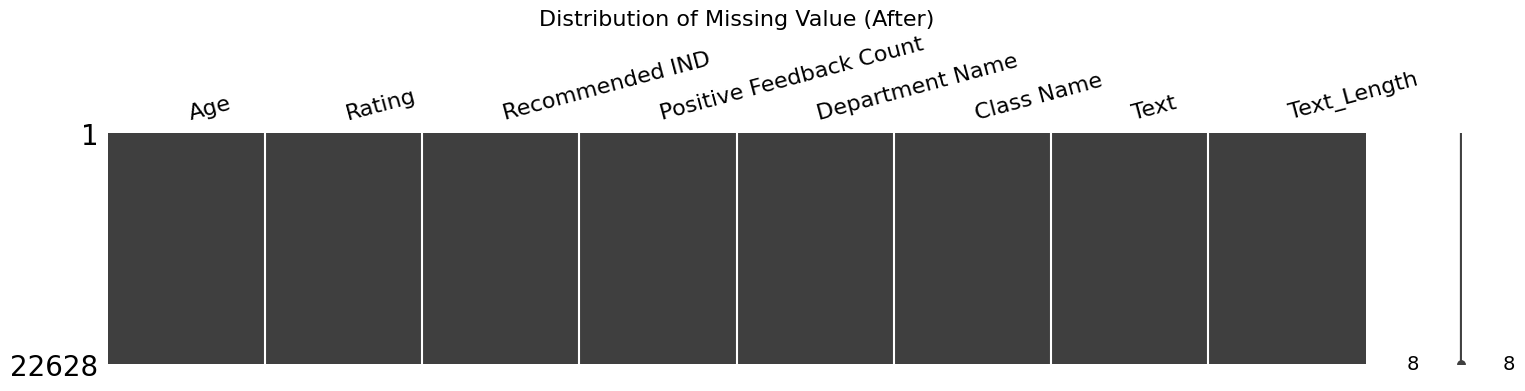

In [ ]:
print('Shape of DataFrame: ',df.shape,'\n')
msno.matrix(df, figsize=(18, 3), label_rotation=15,
           ).set_title('Distribution of Missing Value (After)',fontsize=16);

In [ ]:
df["Recommended IND"].value_counts(normalize=True)

Recommended IND
1    0.818764
0    0.181236
Name: proportion, dtype: float64

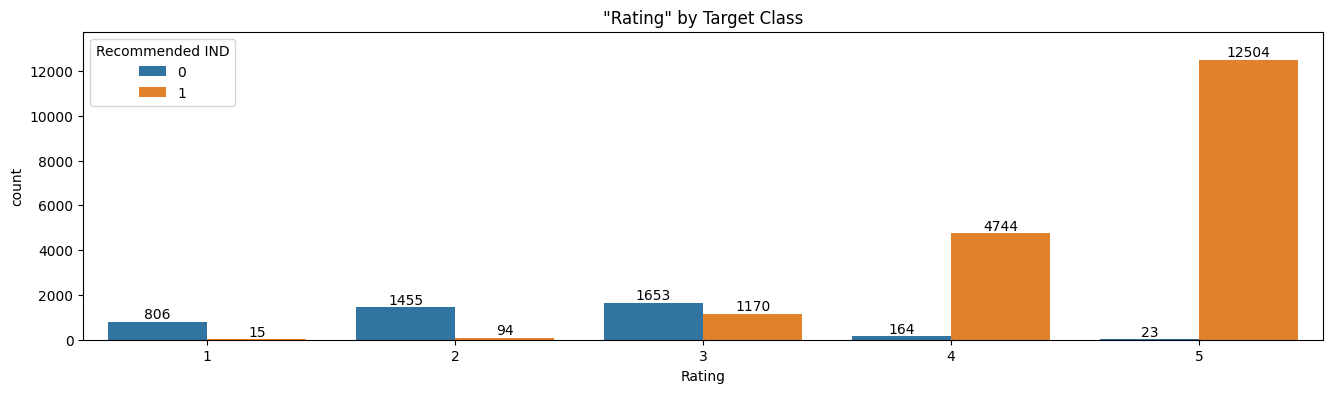

In [ ]:
plt.figure(figsize=(16, 4))
ax = sns.countplot(data = df, x ="Rating", hue = "Recommended IND",
                   order = df['Rating'].value_counts().sort_values().index)
plt.title('"Rating" by Target Class');
plt.margins(y=.1)
for c in ax.containers:
    ax.bar_label(c)

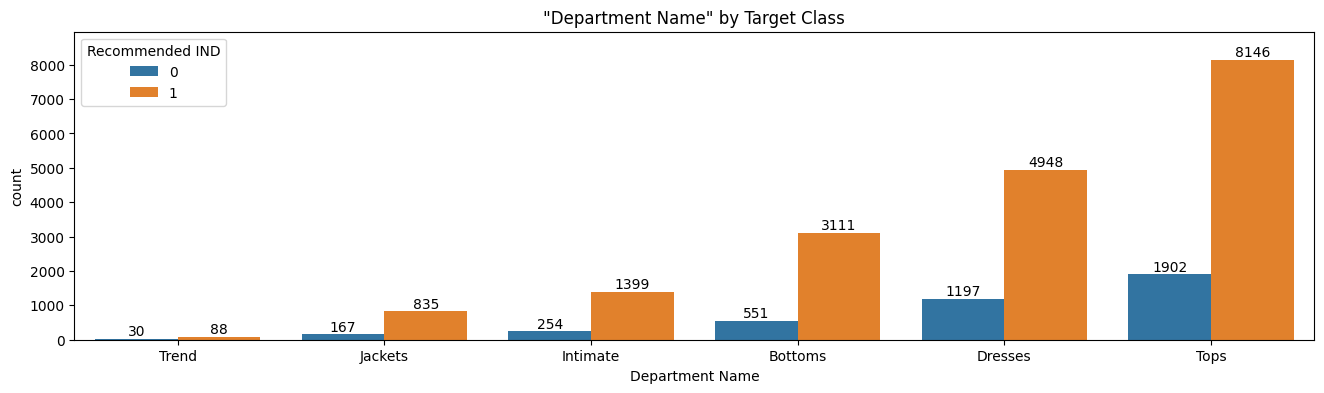

In [ ]:
plt.figure(figsize=(16, 4))
ax = sns.countplot(data =df, x = "Department Name", hue = "Recommended IND",
                   order = df['Department Name'].value_counts().sort_values().index)
plt.title('"Department Name" by Target Class');
plt.margins(y=.1)
for p in ax.containers:
    ax.bar_label(p)

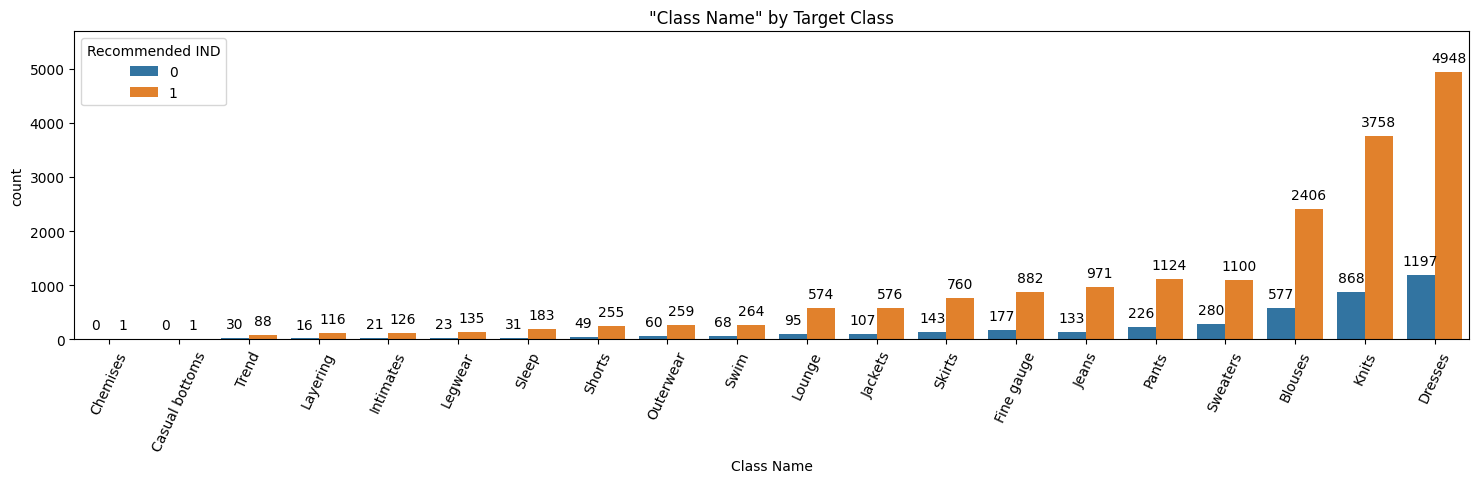

In [ ]:
plt.figure(figsize=(18, 4))
ax = sns.countplot(data =df, x = "Class Name", hue = "Recommended IND",
                   order = df['Class Name'].value_counts().sort_values().index)
plt.title('"Class Name" by Target Class');
plt.xticks(rotation = 65);
plt.margins(y=.15)
for p in ax.containers:
    ax.bar_label(p, rotation=0, padding=5)

<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>3. Feature Selection</strong></h1>   
</div>



In [ ]:
df = pd.DataFrame(df[["Text", "Recommended IND"]].values, columns=['text', 'recommended'])
df.head()

,text,recommended
0,- Absolutely wonderful - silky and sexy and co...,1
1,- Love this dress! it's sooo pretty. i happe...,1
2,Some major design flaws I had such high hopes ...,0
3,"My favorite buy! I love, love, love this jumps...",1
4,Flattering shirt This shirt is very flattering...,1


In [ ]:
df['not_recommended'] = df['recommended'].map({0 : 1, 1: 0})
df

,text,recommended,not_recommended
0,- Absolutely wonderful - silky and sexy and co...,1,0
1,- Love this dress! it's sooo pretty. i happe...,1,0
2,Some major design flaws I had such high hopes ...,0,1
3,"My favorite buy! I love, love, love this jumps...",1,0
4,Flattering shirt This shirt is very flattering...,1,0
...,...,...,...
22623,Great dress for many occasions I was very happ...,1,0
22624,Wish it was made of cotton It reminds me of ma...,1,0
22625,"Cute, but see through This fit well, but the t...",0,1
22626,"Very cute dress, perfect for summer parties an...",1,0


In [ ]:
import nltk
from nltk.corpus import stopwords
# from nltk.tokenize import sent_tokenize, word_tokenize
# nltk.download('all')
# nltk.download('punkt')
# nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet', download_dir='/usr/share/nltk_data')
nltk.download('averaged_perceptron_tagger')

# if 'wordnet' error
!unzip -oq /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


## Text Preprocessing

In [ ]:
def preprocess_cleaning(text, pos_tags=None, lower=False):
    import re, string

    # define stopwords - subtract 'no', 'not', 'nor' and add set(something)
    stop_words = set(stopwords.words('english')) - {'no', 'not', 'nor'} | set()


    text = text.lower() if lower else text

    # 1. Remove Puncs and upper brackets to keep negative auxiliary verbs in text
    text_without_punc = text.translate(str.maketrans('', '', string.punctuation))

    # 2. Tokenize
    # text_tokens = nltk.tokenize.word_tokenize(text_without_punc.lower())  # can be some special Char
    text_tokens = nltk.RegexpTokenizer(r'\w+|\$[\d\.]+|\S+').tokenize(text_without_punc)

    # 3. Removing Stopwords
    tokens_without_sw  = [word for word in text_tokens if word not in stop_words]

    # 4. lemmatize
    tokens_lemmatized = [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in tokens_without_sw]

    if pos_tags is not None:
        # 5. part-of-speech tagging, POS-tagging
        tokens_pos_tagged = nltk.pos_tag(tokens_lemmatized)
        # subtract 'top' for Visualization
        tokens_lemmatized = [word for word, pos_tag in tokens_pos_tagged if pos_tag in pos_tags and word not in ['top']] # ['JJ','JJR','JJS']

    # joining
    return " ".join(tokens_lemmatized)

In [ ]:
df['text_clean']    = df['text'].apply(preprocess_cleaning)
df['text_only_adj'] = df['text'].apply(preprocess_cleaning, pos_tags=['JJ','JJR','JJS'])

## Text Mining

- Detect Reviews (positive and negative separately)
- Collect Words
    - Collect Words (positive and negative separately)
    - Collect Words (Adjectives) with Counter (Positive and Negative separately)
- Build Word Cloud
    - Build Word Cloud (for most common words (Adjectives) in Recommended not Unrecommended Reviews separately)
    - Build Word Cloud with Image Background

### Detect Reviews (positive and negative separately)

In [ ]:
positive_reviews = df[df["not_recommended"] == 0]["text_clean"]
negative_reviews = df[df["not_recommended"] == 1]["text_clean"]

print(positive_reviews.head(3).values)
print()
print(negative_reviews.head(2).values)

['Absolutely wonderful silky sexy comfortable'
 'Love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite 58 love length hit little knee would definitely true midi someone truly petite'
 'My favorite buy I love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment']

['Some major design flaw I high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c'
 'Not petite I love tracy reese dress one not petite 5 foot tall usually wear 0p brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress']


### Collect Words

#### Collect Words (positive and negative separately)

In [ ]:
positive_reviews_words = " ".join(positive_reviews)
negative_reviews_words = " ".join(negative_reviews)

print(positive_reviews_words[:250])
print()
print(negative_reviews_words[:250])


Absolutely wonderful silky sexy comfortable Love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite 58 love length hit little knee would definitely true midi someone truly petite My favorite buy I love

Some major design flaw I high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several


#### Collect Words (Adjectives) with Counter (Positive and Negative separately)

In [ ]:
from collections import Counter

positive_reviews_words = df[df["not_recommended"] == 0]["text_only_adj"].str.split()
positive_reviews_words = ' '.join(np.concatenate(positive_reviews_words.values).reshape(-1))
positive_word_counts   = Counter(positive_reviews_words.split())

negative_reviews_words = df[df["not_recommended"] == 1]["text_only_adj"].str.lower().str.split()
negative_reviews_words = ' '.join(np.concatenate(negative_reviews_words.values).reshape(-1))
negative_word_counts   = Counter(negative_reviews_words.split())

print(positive_word_counts.most_common(10))
print()
print(negative_word_counts.most_common(10))

[('great', 5453), ('small', 3905), ('fit', 3180), ('soft', 3117), ('little', 3015), ('comfortable', 2959), ('large', 2436), ('wear', 2412), ('nice', 2389), ('perfect', 2290)]

[('small', 981), ('fit', 642), ('large', 613), ('much', 583), ('great', 579), ('fabric', 550), ('short', 531), ('big', 507), ('good', 429), ('beautiful', 397)]


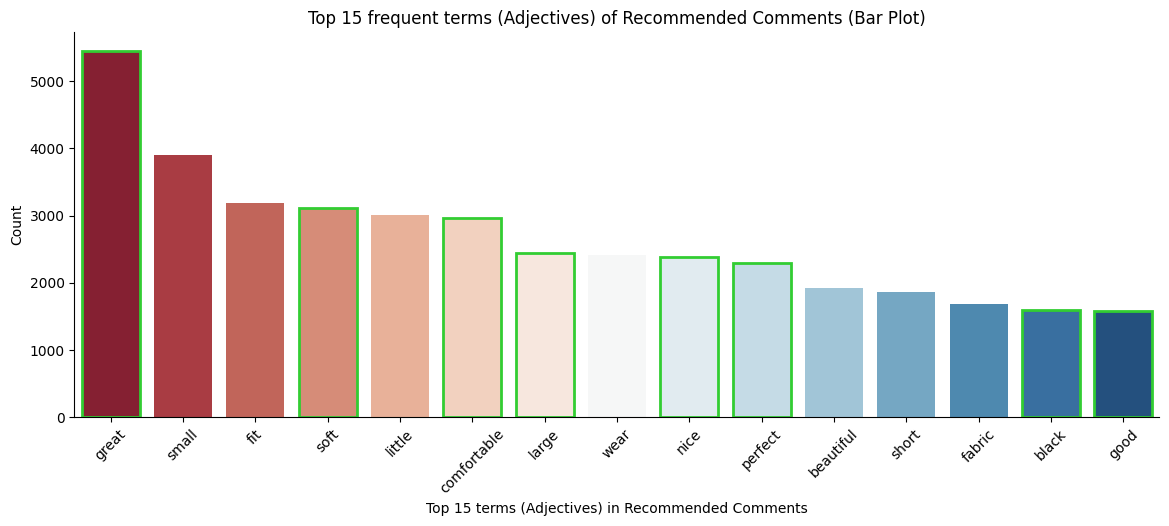

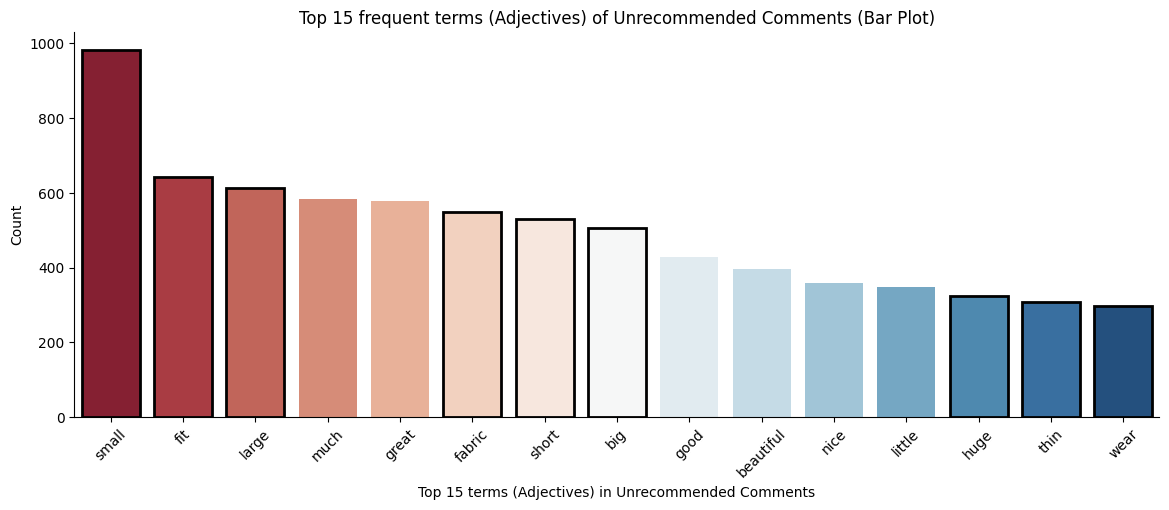

In [ ]:
# Top 15 frequent terms (Adjectives) from comments of recommended products
positive_dict = dict(positive_word_counts.most_common(15))
fig, ax = plt.subplots(figsize=(14, 5))
sns.barplot(x=list(positive_dict.keys()), y=list(positive_dict.values()), ax=ax, palette="RdBu")
ax.set_title('Top 15 frequent terms (Adjectives) of Recommended Comments (Bar Plot)')
ax.set_xlabel('Top 15 terms (Adjectives) in Recommended Comments')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for index in [0, 3, 5, 6, 8, 9, 13, 14]:
    ax.patches[index].set_linewidth(2)
    ax.patches[index].set_edgecolor('limegreen')


# Top 15 frequent terms from comments of unrecommended products
negative_dict = dict(negative_word_counts.most_common(15))
fig2, ax2 = plt.subplots(figsize=(14, 5))
sns.barplot(x=list(negative_dict.keys()), y=list(negative_dict.values()), ax=ax2, palette="RdBu")
ax2.set_title('Top 15 frequent terms (Adjectives) of Unrecommended Comments (Bar Plot)')
ax2.set_xlabel('Top 15 terms (Adjectives) in Unrecommended Comments')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

for index in [0, 1, 2, 5, 6, 7, 12, 13, 14]:
    ax2.patches[index].set_linewidth(2)
    ax2.patches[index].set_edgecolor('black')

plt.show()

### Build Word Cloud


In [ ]:
from wordcloud import WordCloud

stop_words = set(stopwords.words('english')) - {'no', 'not', 'nor'}

param_dict_wc = dict(
    max_words = 100,
    colormap='rocket',
    background_color="black",
    width=1600, height=900,
    stopwords=stop_words,
)
# Generate wordcloud
positive = WordCloud(**param_dict_wc).generate(positive_reviews_words)
negative = WordCloud(**param_dict_wc).generate(negative_reviews_words)
# print(positive.words_)

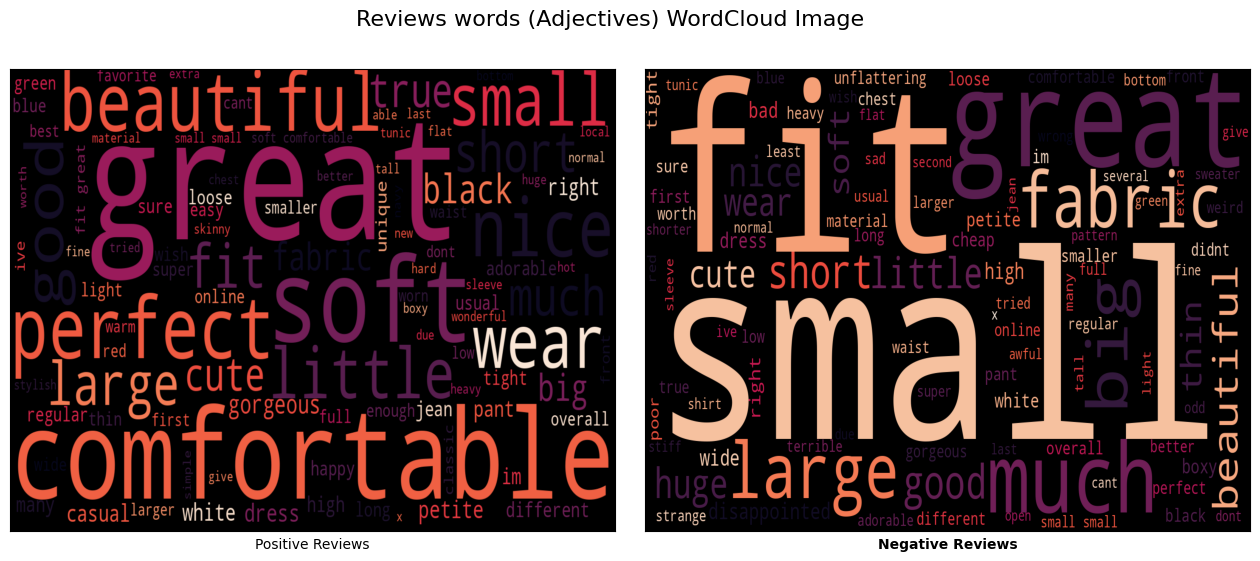

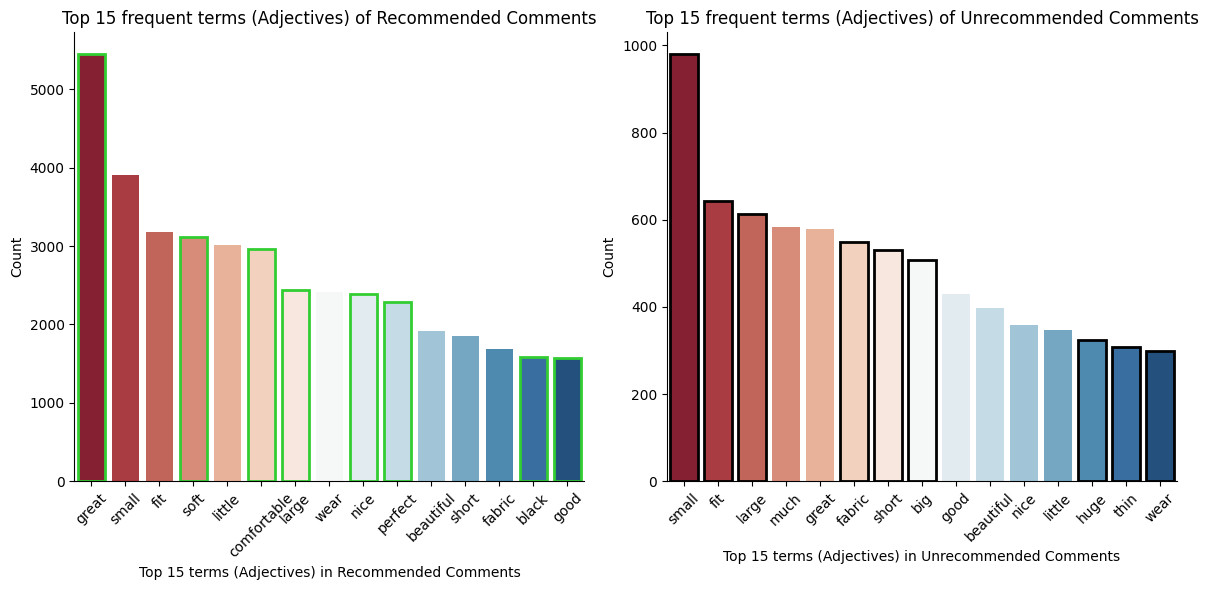

In [ ]:
# !pip install -Uq matplotlib-dashboard
from matplotlib_dashboard import MatplotlibDashboard

#create figure to be used as dashboard
fig = plt.figure(figsize = (16, 6))
fig.suptitle('Reviews words (Adjectives) WordCloud Image', fontsize=16)

dashboard = MatplotlibDashboard([
    ['left', 'right'],
    ['left', 'right'],
], wspace=0.05, hspace=0.05, figure = fig)

# drawing plots ...
dashboard['left'].imshow(positive, interpolation="bilinear", aspect='auto');
dashboard['left'].tick_params(left=False, right=False ,
                              labelleft=False, labelbottom=False, bottom=False)
dashboard['left'].set_xlabel(f'Positive Reviews')

dashboard['right'].imshow(negative, interpolation="kaiser", aspect='auto');
dashboard['right'].tick_params(left=False, right=False ,
                               labelleft=False, labelbottom=False, bottom=False)
dashboard['right'].set_xlabel(f'Negative Reviews', fontweight ='bold')

plt.show()
fig.savefig("wordcloud_reviews.png", dpi=300)


# Top 15 frequent terms (Adjectives) from comments of recommended products
positive_dict = dict(positive_word_counts.most_common(15))
fig = plt.figure(figsize=(12, 6))
gs = mpl.gridspec.GridSpec(1, 2)

ax1 = plt.subplot(gs[0])
sns.barplot(x=list(positive_dict.keys()), y=list(positive_dict.values()), ax=ax1, palette="RdBu")
ax1.set_title('Top 15 frequent terms (Adjectives) of Recommended Comments')
ax1.set_xlabel('Top 15 terms (Adjectives) in Recommended Comments')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for index in [0, 3, 5, 6, 8, 9, 13, 14]:
    ax1.patches[index].set_linewidth(2)
    ax1.patches[index].set_edgecolor('limegreen')

# Top 15 frequent terms from comments of unrecommended products
negative_dict = dict(negative_word_counts.most_common(15))
ax2 = plt.subplot(gs[1])
sns.barplot(x=list(negative_dict.keys()), y=list(negative_dict.values()), ax=ax2, palette="RdBu")
ax2.set_title('Top 15 frequent terms (Adjectives) of Unrecommended Comments')
ax2.set_xlabel('Top 15 terms (Adjectives) in Unrecommended Comments')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

for index in [0, 1, 2, 5, 6, 7, 12, 13, 14]:
    ax2.patches[index].set_linewidth(2)
    ax2.patches[index].set_edgecolor('black')

plt.tight_layout()
plt.show()

fig.savefig("reviews_wordcloud_dashboard.png", dpi=300)

#### Build Word Cloud with Image Background

In [ ]:
from PIL import Image

# Set Image
url = "https://img.freepik.com/premium-vector/boutique-visit-semi-flat-rgb-color-vector-illustration-husband-helps-wife-with-choosing-dress-isolated-cartoon-characters-white-background_106317-17521.jpg"


!wget -qO dress.jpg $url

# np.array(Image.open(requests.get(url, stream=True).raw))
# np.array(Image.open("dress.jpg"))

<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>5. Deep Learning Classification</strong></h1>   
</div>

<div style="letter-spacing:normal; opacity:1.;">
  <h2 style="text-align:left; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:15px;
            line-height:1.4; font-size:28px; font-weight:bold; text-transform: title; padding: 9px;">
            <strong>5.1. Word2Vec</strong></h2>   
</div>

In [ ]:
# !pip -q install gensim==4.3.1
from gensim.models import Word2Vec

label = df_original["Review Text"]
text  = "\n".join(label.astype(str))
text_list = re.split('[\n.!]', text)

corpus = []
for sent in tqdm(text_list):
    corpus.append(sent.split())

model = Word2Vec(corpus, vector_size=10, window=5, min_count=5, sg=1) # size=100

# feature represent
model.wv['small']

  0%|          | 0/142547 [00:00<?, ?it/s]

array([ 0.2625338 , -0.03764432,  0.01337563, -0.4650685 ,  0.82787603,
       -0.25082967,  1.3717235 ,  1.069019  , -0.04198686, -1.0261494 ],
      dtype=float32)

In [ ]:
print(model.wv.most_similar('small'))

[('xsmall', 0.9776811599731445), ('small,', 0.9691612124443054), ('xl,', 0.9667105078697205), ('large', 0.9643205404281616), ('medium', 0.9638315439224243), ('big-', 0.9631722569465637), ('small)', 0.9589086771011353), ('size;', 0.9584594368934631), ('med', 0.9582651853561401), ('xsp', 0.9567930698394775)]


In [ ]:
model.wv.most_similar(positive=['woman', 'blouse'], negative=['man'], topn=5)

[('better', 0.8384222388267517),
 ('else', 0.8312445282936096),
 ('maternity', 0.8271870017051697),
 ('someone', 0.825444757938385),
 ('maxi', 0.825373649597168)]

<div style="letter-spacing:normal; opacity:1.;">
  <h2 style="text-align:left; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:15px;
            line-height:1.4; font-size:28px; font-weight:bold; text-transform: title; padding: 9px;">
            <strong>5.2. Tensorflow LSTM-GRU Model Sentiment Classification</strong></h2>   
</div>


In [ ]:
# !pip install tensorflow -Uq
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix # plot_roc_curve, plot_confusion_matrix, plot_precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay

# !pip install scikeras[tensorflow] -Uq
# from scikeras.wrappers import KerasClassifier, KerasRegressor
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

<div style="letter-spacing:normal; opacity:1.;">
  <h3 style="text-align:left; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:15px;
            line-height:1.4; font-size:28px; font-weight:bold; text-transform: title; padding: 9px;">
            <strong>5.2.1. Tokenization</strong></h3>   
</div>

In [ ]:
df.head()

,text,recommended,not_recommended,text_clean,text_only_adj
0,- Absolutely wonderful - silky and sexy and co...,1,0,Absolutely wonderful silky sexy comfortable,wonderful silky comfortable
1,- Love this dress! it's sooo pretty. i happe...,1,0,Love dress sooo pretty happened find store im ...,find online little true petite
2,Some major design flaws I had such high hopes ...,0,1,Some major design flaw I high hope dress reall...,major petite small usual small small reordered...
3,"My favorite buy! I love, love, love this jumps...",1,0,My favorite buy I love love love jumpsuit fun ...,favorite fabulous wear great
4,Flattering shirt This shirt is very flattering...,1,0,Flattering shirt This shirt flattering due adj...,due adjustable perfect cardigan


In [ ]:
X = df["text_clean"].values
y = df["not_recommended"].values

X.shape, y.shape

((22628,), (22628,))

In [ ]:
# select max tokens number
# num_words = 15000

# create tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=None)  #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'
tokenizer.fit_on_texts(X)

word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)

<div style="letter-spacing:normal; opacity:1.;">
  <h3 style="text-align:left; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:15px;
            line-height:1.4; font-size:28px; font-weight:bold; text-transform: title; padding: 9px;">
            <strong>5.2.2. Sequencing - Converting Words to Numeric Tokens</strong></h3>   
</div>

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X)  # convert sequence all data
X[0], X_num_tokens[0]

('Absolutely wonderful silky sexy comfortable', [181, 397, 800, 487, 28])

#### Number of tokens for each Documents for Padding

In [ ]:
doc_token_length = np.array([len(seq) for seq in tqdm(X_num_tokens)])
print('Max sentence length: ', max(doc_token_length))

  0%|          | 0/22628 [00:00<?, ?it/s]

Max sentence length:  68


In [ ]:
# Detailed Check Each Document Word Count
arr = np.array(doc_token_length)

print("Descriptive analysis")
print("Document Size \t=", arr.shape[0])
print("Doc Token Count\t=", arr)

# measures of central tendency
print("Measures of Central Tendency")
print("Mean \t\t=", arr.mean())
print("Median \t\t=", np.median(arr))
print("Mode \t\t=", stats.mode(arr, keepdims=True)[0][0]) # , keepdims=True

# measures of dispersion
print("Measures of Dispersion")
print("Minimum \t=", arr.min())
print("Maximum \t=", arr.max())
print("Range \t\t=", arr.ptp())
print("Variance \t=", arr.var())
print("Standard Deviation =", arr.std())

Descriptive analysis
Document Size 	= 22628
Doc Token Count	= [ 5 31 54 ... 22 46 16]
Measures of Central Tendency
Mean 		= 33.014760473749334
Median 		= 32.0
Mode 		= 49
Measures of Dispersion
Minimum 	= 2
Maximum 	= 68
Range 		= 66
Variance 	= 208.6609983207428
Standard Deviation = 14.445102918316048


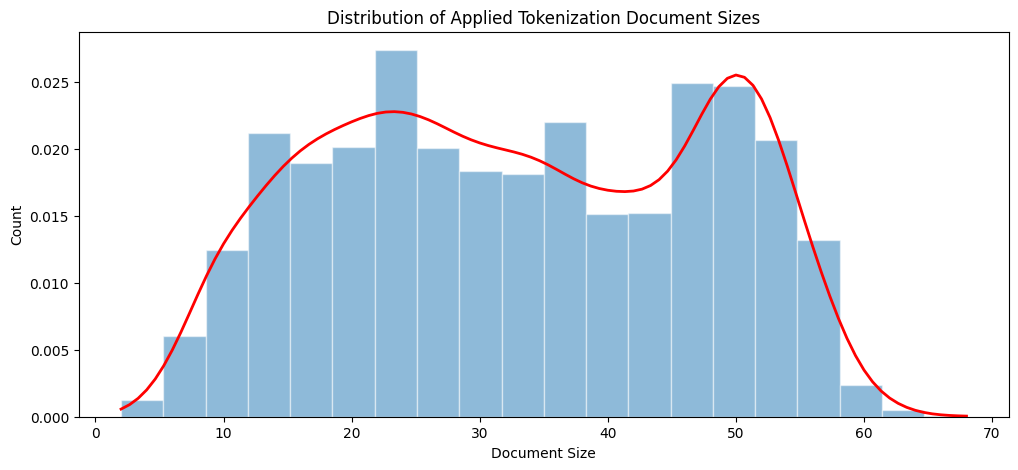

In [ ]:
from scipy.stats import gaussian_kde

# Create the histogram
plt.figure(figsize=(12, 5))
plt.hist(doc_token_length, bins=20, density=True, edgecolor='w', alpha=0.5)
# sns.histplot(doc_token_length, stat='count', discrete=True, kde=True)
# sns.displot(data=doc_token_length, kde=True, rug=True)
plt.title("Distribution of Applied Tokenization Document Sizes")
plt.xlabel("Document Size")
plt.ylabel("Count")

# Estimate the kernel density
kde = gaussian_kde(doc_token_length)
x_grid = np.linspace(min(doc_token_length), max(doc_token_length), 100)
plt.plot(x_grid, kde(x_grid), color='red', linewidth=2)

plt.show()

#### Define Maximum number of tokens from largest Documents for Padding

In [ ]:
max_doc_token_length = None

if max_doc_token_length is None:
    max_doc_token_length = np.max([len(seq) for seq in tqdm(X_num_tokens)])

print(max_doc_token_length)

round(sum(np.array(doc_token_length) < max_doc_token_length) / len(doc_token_length), ndigits=2)

  0%|          | 0/22628 [00:00<?, ?it/s]

68


1.0

<div style="letter-spacing:normal; opacity:1.;">
  <h3 style="text-align:left; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:15px;
            line-height:1.4; font-size:28px; font-weight:bold; text-transform: title; padding: 9px;">
            <strong>5.2.3. Padding - Fixing token counts of each Documents</strong></h3>   
</div>

In [ ]:
X_pad = tf.keras.preprocessing.sequence.pad_sequences(X_num_tokens, maxlen=max_doc_token_length)
X_pad.shape

(22628, 68)

<div style="letter-spacing:normal; opacity:1.;">
  <h3 style="text-align:left; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:15px;
            line-height:1.4; font-size:28px; font-weight:bold; text-transform: title; padding: 9px;">
            <strong>5.2.4 Train - Test Split</strong></h3>   
</div>

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=random_state)
X_train.shape, X_test.shape

((20365, 68), (2263, 68))

<div style="letter-spacing:normal; opacity:1.;">
  <h3 style="text-align:left; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:15px;
            line-height:1.4; font-size:28px; font-weight:bold; text-transform: title; padding: 9px;">
            <strong>5.2.5. GloVe Embedding</strong></h3>   
</div>



In [ ]:
!wget -q http://nlp.stanford.edu/data/glove.6B.zip
!unzip -o glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
GLOVE_FILE        = 'glove.6B.100d.txt'
EMBEDDINGS_DIM    = 100
GLOVE_EMBEDDINGS  = {}
EMBEDDINGS_MATRIX = np.zeros((VOCAB_SIZE+1, EMBEDDINGS_DIM))


with open(GLOVE_FILE) as f:
    for line in tqdm(f):
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        GLOVE_EMBEDDINGS[word] = coefs


missed_list = []

for word, i in tqdm(word_index.items()):
    embedding_vector = GLOVE_EMBEDDINGS.get(word)
    if embedding_vector is not None:
        EMBEDDINGS_MATRIX[i] = embedding_vector
    else:
        missed_list.append(word)

0it [00:00, ?it/s]

  0%|          | 0/18788 [00:00<?, ?it/s]

<h4> How many missing words ? </h4>

In [ ]:
print('How many missed words?: ', len(missed_list))
print('How many missed words?: ', '%', np.divide(len(missed_list), VOCAB_SIZE).round(2) * 100)


print('As example            : ', missed_list[:20])

How many missed words?:  7503
How many missed words?:  % 40.0
As example            :  ['tshirt', 'pilcro', 'armhole', 'seethrough', '34d', 'vneck', 'wellmade', 'xsmall', 'xsp', '36d', 'wouldve', '0p', 'springsummer', 'xxsp', '36dd', '34dd', 'fallwinter', '135lbs', '32dd', 'werent']


<div style="letter-spacing:normal; opacity:1.;">
  <h3 style="text-align:left; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:15px;
            line-height:1.4; font-size:28px; font-weight:bold; text-transform: title; padding: 9px;">
            <strong>5.2.6. Define & Train LSTM-GRU Model</strong></h3>   
</div>



In [ ]:
from keras import backend as K

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)), axis=0)
    recall = true_positives / (possible_positives + K.epsilon())
    return K.mean(recall)

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)), axis=0)
    precision = true_positives / (predicted_positives + K.epsilon())
    return K.mean(precision)

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f1 = 2 * ((p * r) / (p + r + K.epsilon()))
    return f1

In [ ]:
model_name = 'LSTM-GRU-Model'
print(f'Model Name:\t{model_name}')


def build_classifier_model(
    model_name: str     = model_name,
    vocab_size: int     = VOCAB_SIZE,
    embedding_dim:int   = 100,  # EMBEDDINGS_DIM - bert 768
    seq_length: int     = max_doc_token_length,
#     embeddings_matrix   = EMBEDDINGS_MATRIX,  # trained embedding
) -> tf.keras.models.Model:
    import tensorflow as tf


    input_ids      = tf.keras.layers.Input(shape=(seq_length,), name='input_ids', dtype='int32')

    embedding_layer = tf.keras.layers.Embedding(input_dim   = vocab_size+1,
                                               output_dim   = embedding_dim,
                                               input_length = seq_length,
#                                                weights = [embeddings_matrix], trainable=False
                                               )(input_ids)

    x = tf.keras.layers.Dropout(0.3)(embedding_layer)

    x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, # kernel_regularizer=tf.keras.regularizers.l2(0.0005),
                                                           dropout=0.3, recurrent_dropout=0.3))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.GRU(64, return_sequences=False, dropout=0.3)(x)



    x = tf.keras.layers.Dense(64, activation='selu', kernel_regularizer=tf.keras.regularizers.l1())(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(32, activation='softsign')(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(16, activation=tf.keras.layers.PReLU())(x)
    x = tf.keras.layers.Dropout(0.2)(x)


    y = tf.keras.layers.Dense(units=1, activation='sigmoid', name='outputs')(x)

    model = tf.keras.Model(inputs = input_ids, outputs = y, name=f'{model_name}')


    METRICS = [
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        f1_score,
#         tf.keras.metrics.F1Score(threshold=0.50),
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.AUC(curve='ROC', name='auc'),
        tf.keras.metrics.AUC(curve='PR',  name='prc'),
#         tf.keras.metrics.TruePositives(name='tp'),
#         tf.keras.metrics.FalsePositives(name='fp'),
#         tf.keras.metrics.TrueNegatives(name='tn'),
#         tf.keras.metrics.FalseNegatives(name='fn'),
    ]
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss      = tf.keras.losses.BinaryCrossentropy(),
                  metrics   = METRICS,
                  # weighted_metrics = [tf.keras.metrics.Recall()]
    )
    return model

Model Name:	LSTM-GRU-Model


In [ ]:
tf.keras.backend.clear_session()

with strategy.scope():
    model = build_classifier_model()
    model.summary()

Model: "LSTM-GRU-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_ids (InputLayer)      [(None, 68)]              0         
                                                                 
 embedding (Embedding)       (None, 68, 100)           1878900   
                                                                 
 dropout (Dropout)           (None, 68, 100)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 68, 128)          84480     
 l)                                                              
                                                                 
 batch_normalization (BatchN  (None, 68, 128)          512       
 ormalization)                                                   
                                                                 
 gru (GRU)                   (None, 64)             

In [ ]:
# tf.keras.utils.plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_recall', mode="max",
                           verbose = 1, patience = 2, restore_best_weights=True)

In [ ]:
%%time
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), #validation_split = 0.2,
                    batch_size = 64, epochs = 30, callbacks=[early_stop], verbose = 1)

Epoch 1/30


2023-05-10 19:59:36.115360: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add_46/ReadVariableOp.
2023-05-10 19:59:36.396811: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add_46/ReadVariableOp.


319/319 [==============================] - ETA: 0s - loss: 4.3974 - precision: 0.2667 - recall: 0.0011 - f1_score: 0.0011 - accuracy: 0.8184 - auc: 0.5337 - prc: 0.1953

2023-05-10 20:00:10.042623: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add_4/ReadVariableOp.
2023-05-10 20:00:10.187406: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add_4/ReadVariableOp.


319/319 [==============================] - 48s 86ms/step - loss: 4.3974 - precision: 0.2667 - recall: 0.0011 - f1_score: 0.0011 - accuracy: 0.8184 - auc: 0.5337 - prc: 0.1953 - val_loss: 3.8497 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00 - val_accuracy: 0.8188 - val_auc: 0.8013 - val_prc: 0.4680
Epoch 2/30
319/319 [==============================] - 11s 34ms/step - loss: 3.1921 - precision: 0.6535 - recall: 0.2647 - f1_score: 0.2208 - accuracy: 0.8413 - auc: 0.8278 - prc: 0.5372 - val_loss: 2.6301 - val_precision: 0.6399 - val_recall: 0.7976 - val_f1_score: 0.5592 - val_accuracy: 0.8820 - val_auc: 0.9126 - val_prc: 0.7097
Epoch 3/30
319/319 [==============================] - 11s 33ms/step - loss: 2.1975 - precision: 0.6901 - recall: 0.6662 - f1_score: 0.5291 - accuracy: 0.8853 - auc: 0.9049 - prc: 0.6760 - val_loss: 1.7839 - val_precision: 0.6196 - val_recall: 0.8463 - val_f1_score: 0.5789 - val_accuracy: 0.8780 - val_auc: 0.9292 - val_prc: 0.7537
Epo

In [ ]:
model.save('sentiment_analysis_lstm_gru_model.h5')
model.save_weights('sentiment_analysis_lstm_gru_model_weights.h5')

<div style="letter-spacing:normal; opacity:1.;">
  <h3 style="text-align:left; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:15px;
            line-height:1.4; font-size:28px; font-weight:bold; text-transform: title; padding: 9px;">
            <strong>8.2.7. Model evaluation</strong></h3>   
</div>

* 1. Compare Model Metrics

* 2. Compare Each Scores

In [ ]:
summary_lstm = pd.DataFrame(model.history.history)
summary_lstm.tail()

,loss,precision,recall,f1_score,accuracy,auc,prc,val_loss,val_precision,val_recall,val_f1_score,val_accuracy,val_auc,val_prc
0,4.397404,0.266667,0.001084,0.001110,0.818414,0.533709,0.195303,3.849715,0.000000,0.000000,0.000000,0.818825,0.801302,0.467978
1,3.192104,0.653512,0.264698,0.220757,0.841296,0.827798,0.537175,2.630077,0.639922,0.797561,0.559230,0.882015,0.912592,0.709653
2,2.197514,0.690149,0.666215,0.529136,0.885293,0.904870,0.676018,1.783937,0.619643,0.846341,0.578854,0.878038,0.929180,0.753727
3,1.430262,0.722222,0.764292,0.593545,0.904002,0.929703,0.745201,1.122033,0.691489,0.792683,0.579850,0.898365,0.931064,0.768754
4,0.856404,0.745362,0.794636,0.616606,0.913577,0.939604,0.769765,0.664276,0.720482,0.729268,0.548584,0.899691,0.932806,0.771442


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

print('TEST')
y_test_pred = (model.predict(X_test, verbose=0) >= 0.5).astype("int32")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("-------------------------------------------------------")
print('TRAIN')
y_train_pred = (model.predict(X_train, verbose=0) >= 0.5).astype("int32")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

TEST


2023-05-10 20:01:12.707306: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-05-10 20:01:12.808060: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


[[1641  212]
 [  63  347]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1853
           1       0.62      0.85      0.72       410

    accuracy                           0.88      2263
   macro avg       0.79      0.87      0.82      2263
weighted avg       0.90      0.88      0.89      2263

-------------------------------------------------------
TRAIN
[[14990  1684]
 [  300  3391]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     16674
           1       0.67      0.92      0.77      3691

    accuracy                           0.90     20365
   macro avg       0.82      0.91      0.86     20365
weighted avg       0.92      0.90      0.91     20365



In [ ]:

y_test_proba = model.predict(X_test, verbose=0)

precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)


fscore = np.divide((2 * precision * recall), (precision + recall), out=None, where=(precision*recall)!=0) #only divide nonzeros else None

idx = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[idx], fscore[idx]))


auc_1 = auc(recall, precision)
print("auc :", auc_1)

Best Threshold=0.616785, F-Score=0.734
auc : 0.7531392639997246


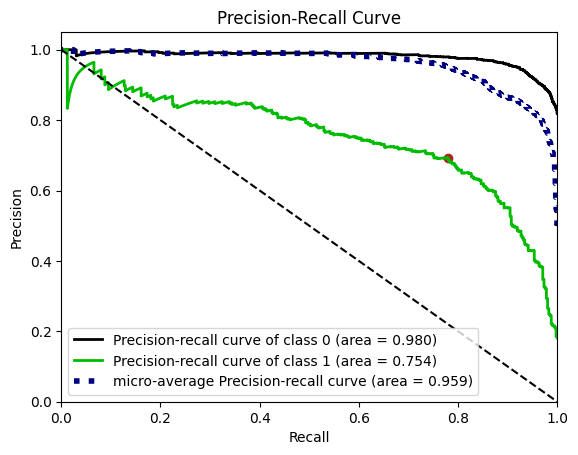

In [ ]:
# !pip install scikit-plot -q
import scikitplot as skplt

y_test_proba = model.predict(X_test, verbose=0)
skplt.metrics.plot_precision_recall(y_test, np.hstack([(1-y_test_proba), y_test_proba]));
# skplt.metrics.plot_roc(y_test, y_prob_test)
plt.scatter(recall[idx], precision[idx], marker='o', color='firebrick', label='Best')
plt.plot([0, 1],[1, 0], 'k--')
plt.show()

In [ ]:
# use BEST THRESHOLD thresholds[idx]=0.644297

print('TEST')
y_test_pred = (model.predict(X_test, verbose=0) >= thresholds[idx]).astype("int32")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("-------------------------------------------------------")
print('TRAIN')
y_train_pred = (model.predict(X_train, verbose=0) >= thresholds[idx]).astype("int32")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

TEST
[[1711  142]
 [  90  320]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1853
           1       0.69      0.78      0.73       410

    accuracy                           0.90      2263
   macro avg       0.82      0.85      0.84      2263
weighted avg       0.90      0.90      0.90      2263

-------------------------------------------------------
TRAIN
[[15609  1065]
 [  575  3116]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     16674
           1       0.75      0.84      0.79      3691

    accuracy                           0.92     20365
   macro avg       0.85      0.89      0.87     20365
weighted avg       0.92      0.92      0.92     20365



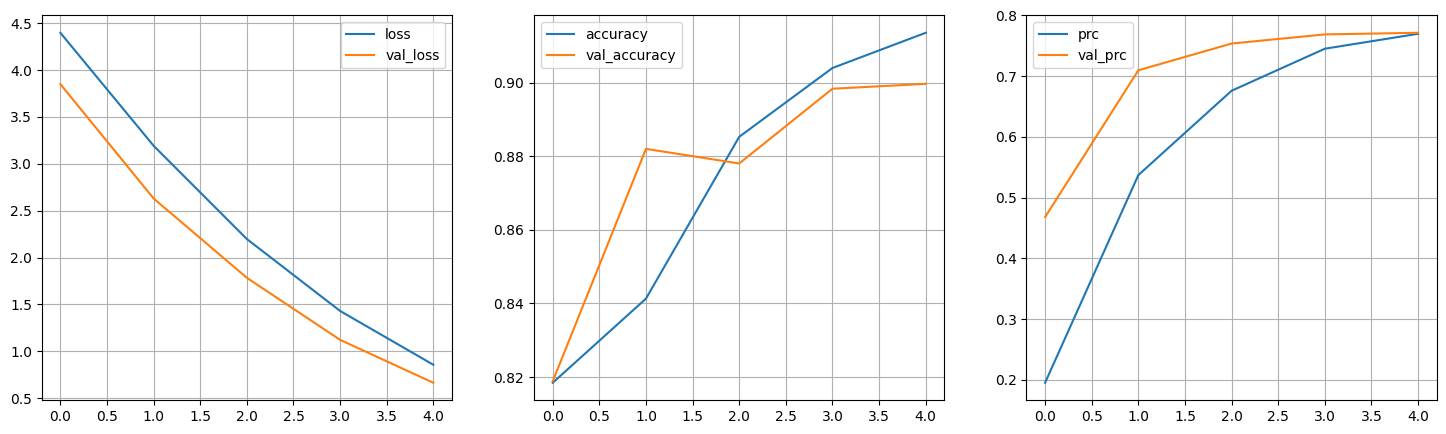

In [ ]:

H = history.history
fig = plt.figure(figsize = (18, 5))

plt.subplot(131)
plt.plot(H['loss'], label = 'loss')
plt.plot(H['val_loss'], label = 'val_loss')
plt.grid()
plt.legend()

plt.subplot(132)
plt.plot(H['accuracy'], label = 'accuracy')
plt.plot(H['val_accuracy'], label = 'val_accuracy')
plt.grid()
plt.legend();

plt.subplot(133)
plt.plot(H['prc'], label = 'prc')
plt.plot(H['val_prc'], label = 'val_prc')
plt.grid()
plt.legend();

In [ ]:
model_lstm_gru = tf.keras.models.load_model('sentiment_analysis_lstm_gru_model.h5', custom_objects={'f1_score': f1_score})
model_lstm_gru

In [ ]:
# !pip install transformers -Uq
from transformers import AutoTokenizer, AutoModel, TFAutoModel, AutoConfig
from transformers import pipeline

<div style="letter-spacing:normal; opacity:1.;">
  <h3 style="text-align:left; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:15px;
            line-height:1.4; font-size:28px; font-weight:bold; text-transform: title; padding: 9px;">
            <strong>8.3.1. Train - Test Split</strong></h3>   
</div>

In [ ]:
df

,text,recommended,not_recommended,text_clean,text_only_adj
0,- Absolutely wonderful - silky and sexy and co...,1,0,Absolutely wonderful silky sexy comfortable,wonderful silky comfortable
1,- Love this dress! it's sooo pretty. i happe...,1,0,Love dress sooo pretty happened find store im ...,find online little true petite
2,Some major design flaws I had such high hopes ...,0,1,Some major design flaw I high hope dress reall...,major petite small usual small small reordered...
3,"My favorite buy! I love, love, love this jumps...",1,0,My favorite buy I love love love jumpsuit fun ...,favorite fabulous wear great
4,Flattering shirt This shirt is very flattering...,1,0,Flattering shirt This shirt flattering due adj...,due adjustable perfect cardigan
...,...,...,...,...,...
22623,Great dress for many occasions I was very happ...,1,0,Great dress many occasion I happy snag dress g...,many happy great easy
22624,Wish it was made of cotton It reminds me of ma...,1,0,Wish made cotton It reminds maternity clothes ...,Wish soft stretchy front awkward sleeve
22625,"Cute, but see through This fit well, but the t...",0,1,Cute see This fit well top see never would wor...,fit im able didnt different great
22626,"Very cute dress, perfect for summer parties an...",1,0,Very cute dress perfect summer party I bought ...,cute perfect fit perfect fit long big spend wo...


In [ ]:
# X = df['text'].map(lambda text: text.translate(str.maketrans('', '', string.punctuation))).values

X = df['text'].values
y = df['not_recommended'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, stratify=y, random_state=random_state)

X_test = df[df['not_recommended'] == 1]['text']

X_train.shape, X_val.shape, X_test.shape,

((20365,), (2263,), (4101,))

In [ ]:
display(pd.value_counts(y_train), np.bincount(y_train))

0    16674
1     3691
Name: count, dtype: int64

array([16674,  3691])

<div style="letter-spacing:normal; opacity:1.;">
  <h3 style="text-align:left; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:15px;
            line-height:1.4; font-size:28px; font-weight:bold; text-transform: title; padding: 9px;">
            <strong>8.3.2. Define Tokenizer - Tokenization and Sequencing</strong></h3>   
</div>

In [ ]:
from transformers import AutoTokenizer

model_name = "bert-base-uncased"
# model_name = "bert-large-uncased"
# model_name = "bert-large-uncased-whole-word-masking-finetuned-squad"

# model_name = "microsoft/deberta-v2-xxlarge"

tokenizer  = AutoTokenizer.from_pretrained(model_name)

In [ ]:
doc_token_length = np.array([len(tokenizer.encode(sent, add_special_tokens=True)) for sent in tqdm(X)])
print('Max sentence length: ', max(doc_token_length))

  0%|          | 0/22628 [00:00<?, ?it/s]

Max sentence length:  168


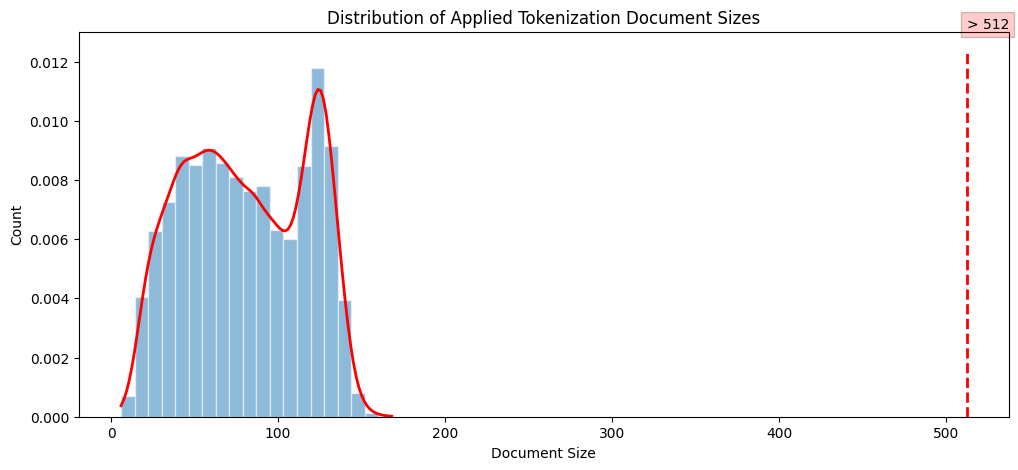

In [ ]:
from scipy.stats import gaussian_kde

max_doc_token_length = 512

plt.figure(figsize=(12, 5))
plt.hist(doc_token_length, bins=20, density=True, edgecolor='w', alpha=0.5)
# sns.histplot(x=doc_token_length, stat='count', discrete=True, kde=True, color='dodgerblue')
plt.title("Distribution of Applied Tokenization Document Sizes")
plt.xlabel("Document Size")
plt.ylabel("Count")

kde = gaussian_kde(doc_token_length)
x_grid = np.linspace(min(doc_token_length), max(doc_token_length), 100)
plt.plot(x_grid, kde(x_grid), color='red', linewidth=2)


plt.vlines(x=max_doc_token_length, ymin=0, ymax=plt.ylim()[1], colors ="r", ls ="dashed", lw=2)
plt.text(x=max_doc_token_length, y=plt.ylim()[1], s=f'> {max_doc_token_length}', ha='left', va='bottom',rotation='horizontal',
         fontsize=10, backgroundcolor='white', bbox=dict(facecolor='red', alpha=0.2))

plt.show()

In [ ]:
if max(doc_token_length) < 512:
    max_doc_token_length = max(doc_token_length)

print(max_doc_token_length)

round(sum(np.array(doc_token_length) < max_doc_token_length) / len(doc_token_length), ndigits=2)

168


1.0

<div style="letter-spacing:normal; opacity:1.;">
  <h3 style="text-align:left; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:15px;
            line-height:1.4; font-size:28px; font-weight:bold; text-transform: title; padding: 9px;">
            <strong>8.3.3. Apply Tokenizer ( Transformation text to TENSOR ) - Padding</strong></h3>   
</div>

In [ ]:
labels_train = y_train.reshape(-1, 1)
labels_val   = y_val.reshape(-1, 1)

labels_train.shape, labels_val.shape

((20365, 1), (2263, 1))

In [ ]:
def transformation(X, seq_len):

    Xids  = np.zeros((len(X), seq_len))
    Xmask = np.zeros((len(X), seq_len))

    for i, sentences in enumerate(X):

        tokens = tokenizer.encode_plus(
            text=sentences,
            add_special_tokens=True,
            max_length = seq_len,
            pad_to_max_length=True,
            return_attention_mask = True,
            padding = 'max_length',
            truncation = True,
#             stride = 64
#             return_tensors = 'pt',
        )

        Xids[i]  = tokens['input_ids']
        Xmask[i] = tokens['attention_mask']
    return Xids, Xmask

Xids_train, Xmask_train = transformation(X_train, max_doc_token_length)
Xids_val,   Xmask_val   = transformation(X_val, max_doc_token_length)
Xids_test,  Xmask_test  = transformation(X_test, max_doc_token_length)

print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print()
print("Xids_val.shape    :", Xids_val.shape)
print("Xmask_val.shape   :", Xmask_val.shape)
print()
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (20365, 168)
Xmask_train.shape : (20365, 168)

Xids_val.shape    : (2263, 168)
Xmask_val.shape   : (2263, 168)

Xids_test.shape   : (4101, 168)
Xmask_test.shape  : (4101, 168)


### Transformation Matrix to Tensor

In [ ]:
dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_val   = tf.data.Dataset.from_tensor_slices((Xids_val,   Xmask_val,   labels_val))
dataset_test  = tf.data.Dataset.from_tensor_slices((Xids_test,  Xmask_test))

dataset_train, dataset_val, dataset_test

(<_TensorSliceDataset element_spec=(TensorSpec(shape=(168,), dtype=tf.float64, name=None), TensorSpec(shape=(168,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>,
 <_TensorSliceDataset element_spec=(TensorSpec(shape=(168,), dtype=tf.float64, name=None), TensorSpec(shape=(168,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>,
 <_TensorSliceDataset element_spec=(TensorSpec(shape=(168,), dtype=tf.float64, name=None), TensorSpec(shape=(168,), dtype=tf.float64, name=None))>)

In [ ]:
def map_func(Xids, Xmask, labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Xids, 'attention_mask': Xmask}, labels

def map_func_no_label(Xids, Xmask):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Xids, 'attention_mask': Xmask}

# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_val   = dataset_val.map(map_func)
dataset_test  = dataset_test.map(map_func_no_label)

dataset_train, dataset_val, dataset_test

(<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(168,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(168,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>,
 <_MapDataset element_spec=({'input_ids': TensorSpec(shape=(168,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(168,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>,
 <_MapDataset element_spec={'input_ids': TensorSpec(shape=(168,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(168,), dtype=tf.float64, name=None)}>)

### Batch Size - Optimization Dataset

In [ ]:

batch_size = 64 # 16, 32


train_ds = dataset_train.batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_ds   = dataset_val.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_ds  = dataset_test.batch(batch_size).prefetch(tf.data.AUTOTUNE)

train_ds2 = dataset_train.shuffle(buffer_size = len(X_train), reshuffle_each_iteration=True).batch(batch_size).prefetch(tf.data.AUTOTUNE)

<div style="letter-spacing:normal; opacity:1.;">
  <h3 style="text-align:left; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:15px;
            line-height:1.4; font-size:28px; font-weight:bold; text-transform: title; padding: 9px;">
            <strong>8.3.4. Define & Train BERT Model</strong></h3>   
</div>

In [ ]:
print(f'Model Name:\t{model_name}', f'\nSentence Len:\t{max_doc_token_length}')


def build_classifier_model(
    model_name: str     = model_name,
    seq_length: int     = max_doc_token_length,
) -> tf.keras.models.Model:
    import tensorflow as tf
    from transformers import TFAutoModel, AutoModel, AutoConfig


    model          = TFAutoModel.from_pretrained(model_name)


    input_ids      = tf.keras.layers.Input(shape=(seq_length,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(seq_length,), name='attention_mask', dtype='int32')


    last_hidden_state = model.bert(input_ids=input_ids, attention_mask=attention_mask).last_hidden_state


    x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(768, return_sequences=True,
                                                          dropout=0.2, recurrent_dropout=0.2))(last_hidden_state)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.GRU(768, return_sequences=False, dropout=0.2)(x)


#     pooler_output = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]
#     pooled_output = model.deberta(input_ids=input_ids, attention_mask = attention_mask)[0]
#     pooled_output = tf.reduce_mean(pooled_output, axis=1)



    x = tf.keras.layers.Dense(512, activation='selu', kernel_regularizer=tf.keras.regularizers.l1())(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(256, activation='softsign')(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(128, activation=tf.keras.layers.PReLU())(x)
    x = tf.keras.layers.Dropout(0.2)(x)


    y = tf.keras.layers.Dense(units=1, activation='sigmoid', name='outputs')(x)

    model = tf.keras.Model(inputs = [input_ids, attention_mask], outputs = y,
                            name=f'{model_name}-BERT-BinaryLabel')


    METRICS = [
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
#         tf.keras.metrics.F1Score(threshold=0.50),
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.AUC(curve='ROC', name='auc'),
        tf.keras.metrics.AUC(curve='PR',  name='prc'),
#         tf.keras.metrics.TruePositives(name='tp'),
#         tf.keras.metrics.FalsePositives(name='fp'),
#         tf.keras.metrics.TrueNegatives(name='tn'),
#         tf.keras.metrics.FalseNegatives(name='fn'),
    ]
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-6),  # tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0),
                  loss      = tf.keras.losses.BinaryCrossentropy(),
                  metrics   = METRICS,
                  # weighted_metrics = [tf.keras.metrics.Recall()]
    )
    return model

Model Name:	bert-base-uncased 
Sentence Len:	168


In [ ]:
tf.keras.backend.clear_session()

with strategy.scope():
    model = build_classifier_model()
    model.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "bert-base-uncased-BERT-BinaryLabel"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 168)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 168)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 168,              

In [ ]:
# tf.keras.utils.plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max",
                           verbose = 1, patience = 2, restore_best_weights=True)

In [ ]:
%%time
history = model.fit(train_ds2, validation_data = val_ds, #validation_split = 0.2,
                    batch_size = 1, epochs = 30, callbacks=[early_stop], verbose = 1, class_weight = {0:1, 1:4})

Epoch 1/30


2023-05-10 20:05:11.084181: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add_434/ReadVariableOp.
2023-05-10 20:05:12.198219: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add_434/ReadVariableOp.


319/319 [==============================] - ETA: 0s - loss: 135.0510 - precision: 0.2218 - recall: 0.4405 - accuracy: 0.6184 - auc: 0.5772 - prc: 0.2255

2023-05-10 20:09:15.656192: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add/ReadVariableOp.
2023-05-10 20:09:15.995228: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add/ReadVariableOp.


319/319 [==============================] - 313s 566ms/step - loss: 135.0510 - precision: 0.2218 - recall: 0.4405 - accuracy: 0.6184 - auc: 0.5772 - prc: 0.2255 - val_loss: 133.9731 - val_precision: 0.4415 - val_recall: 0.7366 - val_accuracy: 0.7835 - val_auc: 0.8435 - val_prc: 0.5289
Epoch 2/30
319/319 [==============================] - 96s 299ms/step - loss: 133.5452 - precision: 0.4473 - recall: 0.7849 - accuracy: 0.7852 - auc: 0.8666 - prc: 0.5861 - val_loss: 132.5169 - val_precision: 0.5972 - val_recall: 0.9293 - val_accuracy: 0.8736 - val_auc: 0.9485 - val_prc: 0.7602
Epoch 3/30
319/319 [==============================] - 95s 298ms/step - loss: 132.0832 - precision: 0.6061 - recall: 0.9038 - accuracy: 0.8761 - auc: 0.9384 - prc: 0.7431 - val_loss: 131.3017 - val_precision: 0.6302 - val_recall: 0.9268 - val_accuracy: 0.8882 - val_auc: 0.9571 - val_prc: 0.8046
Epoch 4/30
319/319 [==============================] - 96s 299ms/step - loss: 130.8220 - precision: 0.6376 - recall: 0.9125 - 

In [ ]:
model.save('sentiment_analysis_bert_model.h5')
model.save_weights('sentiment_analysis_bert_model_weights.h5')

<div style="letter-spacing:normal; opacity:1.;">
  <h3 style="text-align:left; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:15px;
            line-height:1.4; font-size:28px; font-weight:bold; text-transform: title; padding: 9px;">
            <strong>8.3.5. Model evaluation</strong></h3>   
</div>

* 1. Compare Model Metrics

* 2. Compare Each Scores

In [ ]:
# %%time
# model.evaluate(val_ds, return_dict=True, verbose=0), \
# model.evaluate(train_ds, return_dict=True, verbose=0)

In [ ]:
summary_bert = pd.DataFrame(model.history.history)
summary_bert.tail()

,loss,precision,recall,accuracy,auc,prc,val_loss,val_precision,val_recall,val_accuracy,val_auc,val_prc
3,130.822021,0.637637,0.912490,0.890155,0.950137,0.766480,130.115356,0.616613,0.941463,0.883341,0.960459,0.824928
4,129.587570,0.653552,0.927120,0.897717,0.956248,0.789813,128.902054,0.625000,0.939024,0.886876,0.961636,0.828344
5,128.366013,0.662688,0.932539,0.901743,0.960808,0.811850,127.716599,0.616352,0.956098,0.884224,0.963455,0.841730
6,127.148003,0.671124,0.938228,0.905475,0.964183,0.826043,126.511734,0.623003,0.951219,0.886876,0.963163,0.839211
7,125.931625,0.683694,0.942834,0.910582,0.967439,0.828824,125.285934,0.650602,0.921951,0.896156,0.964266,0.845984


#### predict data whole chunk

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

print('TEST')
y_val_pred = (model.predict(val_ds, verbose=0) >= 0.5).astype("int32")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print("-------------------------------------------------------")
print('TRAIN')
y_train_pred = (model.predict(train_ds, verbose=0) >= 0.5).astype("int32")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

TEST


2023-05-10 20:21:48.292975: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-05-10 20:21:48.647199: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


[[1609  244]
 [  19  391]]
              precision    recall  f1-score   support

           0       0.99      0.87      0.92      1853
           1       0.62      0.95      0.75       410

    accuracy                           0.88      2263
   macro avg       0.80      0.91      0.84      2263
weighted avg       0.92      0.88      0.89      2263

-------------------------------------------------------
TRAIN
[[14721  1953]
 [  115  3576]]
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     16674
           1       0.65      0.97      0.78      3691

    accuracy                           0.90     20365
   macro avg       0.82      0.93      0.86     20365
weighted avg       0.93      0.90      0.91     20365



In [ ]:

y_val_proba = model.predict(val_ds, verbose=0)

precision, recall, thresholds = precision_recall_curve(y_val, y_val_proba)


fscore = np.divide((2 * precision * recall), (precision + recall), out=None, where=(precision*recall)!=0) #only divide nonzeros else None

idx = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[idx], fscore[idx]))


auc_1 = auc(recall, precision)
print("auc :", auc_1)

Best Threshold=0.927715, F-Score=0.792
auc : 0.8419776884524661


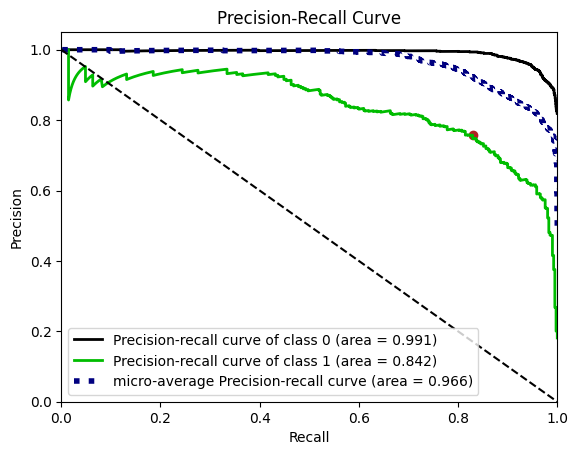

In [ ]:
# !pip install scikit-plot -q
import scikitplot as skplt


y_val_proba = model.predict(val_ds, verbose=0)
skplt.metrics.plot_precision_recall(y_val, np.hstack([(1-y_val_proba), y_val_proba]));

plt.scatter(recall[idx], precision[idx], marker='o', color='firebrick', label='Best')
plt.plot([0, 1],[1, 0], 'k--')
plt.show()

#### predict data chunk by batch

In [ ]:



y_val, y_val_prob = [[] for _ in range(2)]

for X_batch, y_batch in tqdm(val_ds):
    y_val      += y_batch.numpy().tolist()
    y_val_prob += model.predict_on_batch(X_batch).squeeze().tolist()

y_val, y_val_pred = np.array(y_val), (np.array(y_val_prob) >= thresholds[idx]).astype("int32")



y_train, y_train_prob = [[] for _ in range(2)]

for X_batch, y_batch in tqdm(train_ds):
    y_train      += y_batch.numpy().tolist()
    y_train_prob += model.predict_on_batch(X_batch).squeeze().tolist()

y_train, y_train_pred = np.array(y_train), (np.array(y_train_prob) >= thresholds[idx]).astype("int32")


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score, auc

print('TEST')
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred, zero_division=0))
print("-------------------------------------------------------")
print('TRAIN')
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred, zero_division=0))

  0%|          | 0/36 [00:00<?, ?it/s]

2023-05-10 20:25:13.303059: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-05-10 20:25:13.445953: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-05-10 20:25:43.872338: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-05-10 20:25:44.094204: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


  0%|          | 0/319 [00:00<?, ?it/s]

TEST
[[1744  109]
 [  70  340]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1853
           1       0.76      0.83      0.79       410

    accuracy                           0.92      2263
   macro avg       0.86      0.89      0.87      2263
weighted avg       0.92      0.92      0.92      2263

-------------------------------------------------------
TRAIN
[[15847   827]
 [  554  3137]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     16674
           1       0.79      0.85      0.82      3691

    accuracy                           0.93     20365
   macro avg       0.88      0.90      0.89     20365
weighted avg       0.93      0.93      0.93     20365



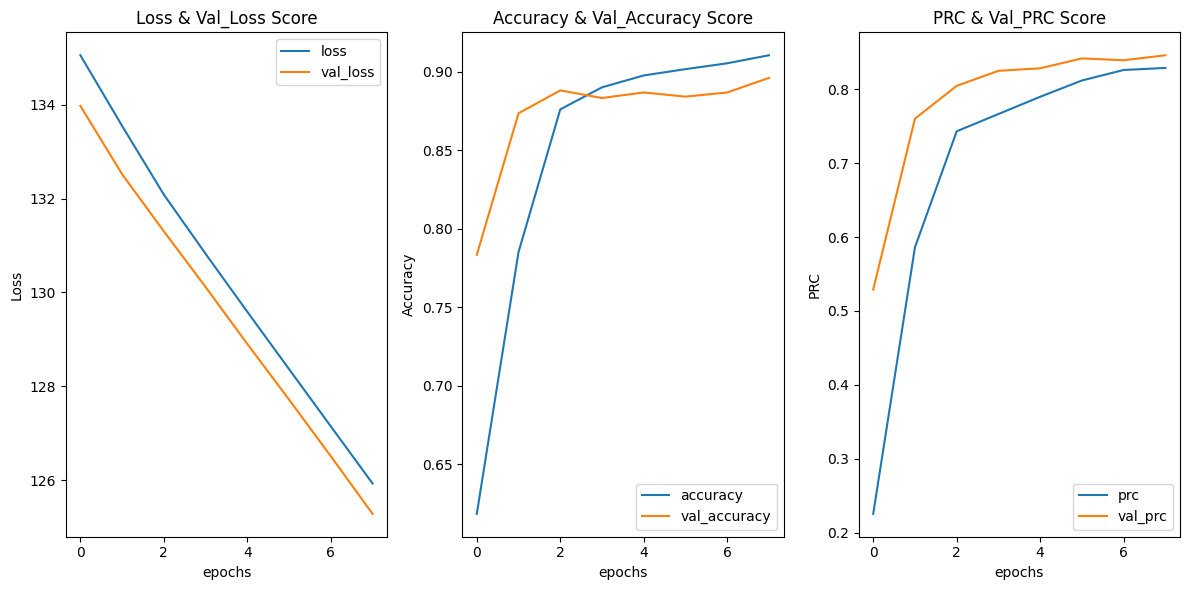

In [ ]:
H = history.history


fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))


axs[0].plot(H['loss'], label='loss')
axs[0].plot(H['val_loss'], label='val_loss')
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('Loss')
axs[0].set_title('Loss & Val_Loss Score')
axs[0].legend()


axs[1].plot(H['accuracy'], label='accuracy')
axs[1].plot(H['val_accuracy'], label='val_accuracy')
axs[1].set_xlabel('epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Accuracy & Val_Accuracy Score')
axs[1].legend()


axs[2].plot(H['prc'], label='prc')
axs[2].plot(H['val_prc'], label='val_prc')
axs[2].set_xlabel('epochs')
axs[2].set_ylabel('PRC')
axs[2].set_title('PRC & Val_PRC Score')
axs[2].legend()

plt.tight_layout()
plt.show()

In [ ]:
# import plotly.graph_objs as go
# from plotly.subplots import make_subplots

# H = history.history

# # Define the first subplot for AUC and validation AUC
# fig1 = go.Figure(data=[
#     go.Scatter(y=H['loss'], name='loss'),
#     go.Scatter(y=H['val_loss'], name='val_loss')
# ])

# # Define the second subplot for loss and validation loss
# fig2 = go.Figure(data=[
#     go.Scatter(y=H['accuracy'], name='accuracy'),
#     go.Scatter(y=H['val_accuracy'], name='val_accuracy')
# ])

# # Combine the subplots into a single figure
# figures = [fig1, fig2]
# titles = ['Loss & Val_Loss Score', 'Accuracy & Val_Accuracy Score']
# fig = make_subplots(cols=len(figures), subplot_titles=titles)

# for i, figure in enumerate(figures):
#     for trace in range(len(figure["data"])):
#         fig.add_trace(figure["data"][trace], row=1, col=i+1)

# fig.update_xaxes(title_text="epochs", row=1, col=1)
# fig.update_xaxes(title_text="epochs", row=1, col=2)

# fig.update_yaxes(title_text="Loss", row=1, col=1)
# fig.update_yaxes(title_text="Accuracy", row=1, col=2)

# fig.update_layout(template="simple_white", title='LOSS & ACCURACY',
#                   font=dict(size=17, family='Franklin Gothic'))

## Predict Val Data

In [ ]:
def get_average_metrics_batch_dataset(dataset, thresholds=0.5):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


    precision_list, recall_list, f1_list, accuracy_list, auc_list = [[] for _ in range(5)]


    for X_batch, y_batch in tqdm(dataset):


        y_prob = model.predict_on_batch(X_batch)

        y_pred = (y_prob >= thresholds).astype("int32")

        precision_list.append(precision_score(y_batch, y_pred))
        recall_list.append(recall_score(y_batch, y_pred))
        f1_list.append(f1_score(y_batch, y_pred))
        accuracy_list.append(accuracy_score(y_batch, y_pred))
        auc_list.append(roc_auc_score(y_batch, y_prob))


    precision = sum(precision_list) / len(precision_list)
    recall    = sum(recall_list)    / len(recall_list)
    f1        = sum(f1_list)        / len(f1_list)
    accuracy  = sum(accuracy_list)  / len(accuracy_list)
    auc       = sum(auc_list)       / len(auc_list)


    print('Precision: {:.2f}'.format(precision))
    print('Recall   : {:.2f}'.format(recall))
    print('F1 Score : {:.2f}'.format(f1))
    print('Accuracy : {:.2f}'.format(accuracy))
    print('AUC      : {:.2f}'.format(auc))


    return [precision, recall, f1, accuracy, auc]

In [ ]:

val_score_list = get_average_metrics_batch_dataset(val_ds, thresholds=thresholds[idx])

  0%|          | 0/36 [00:00<?, ?it/s]

Precision: 0.76
Recall   : 0.84
F1 Score : 0.79
Accuracy : 0.92
AUC      : 0.96


In [ ]:

train_score_list = get_average_metrics_batch_dataset(train_ds, thresholds=thresholds[idx])

  0%|          | 0/319 [00:00<?, ?it/s]

Precision: 0.79
Recall   : 0.85
F1 Score : 0.81
Accuracy : 0.93
AUC      : 0.97


/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


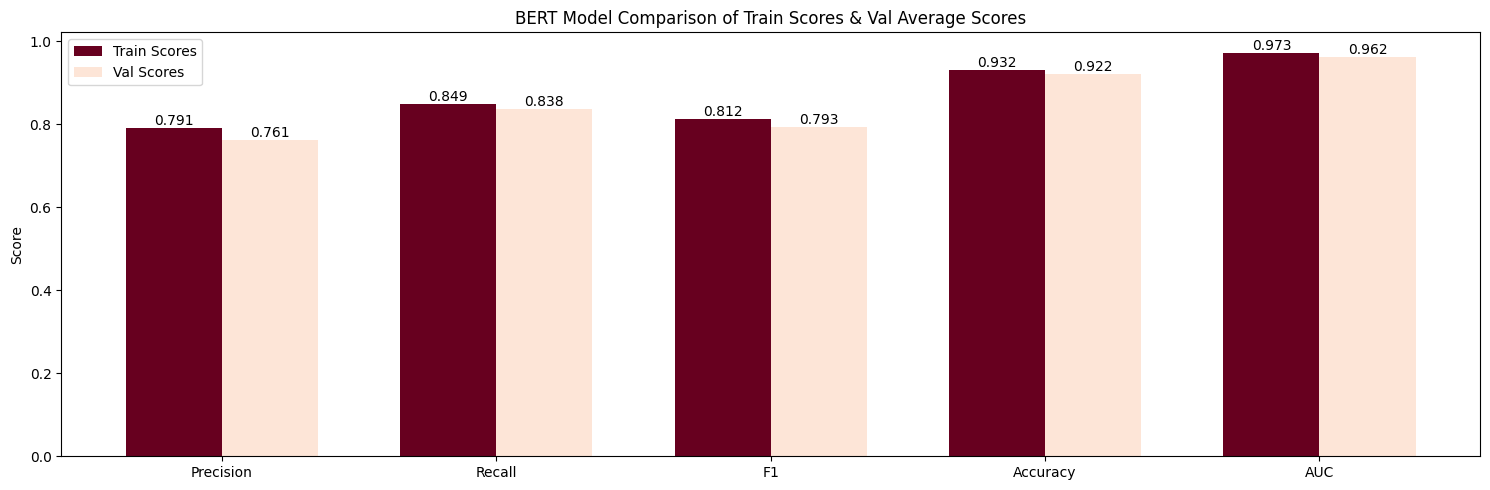

In [ ]:
score_name = ['Precision', 'Recall', 'F1', 'Accuracy', 'AUC']
bar_width  = 0.35
index = np.arange(len(score_name))

fig, ax = plt.subplots(figsize=(15, 5))


ax.bar(index, train_score_list, bar_width, label='Train Scores', color='#67001f')


ax.bar(index + bar_width, val_score_list, bar_width, label='Val Scores', color='#fddbc7', alpha=0.7)


for i, train_score in enumerate(train_score_list):
    ax.text(i, train_score, str(round(train_score, 3)), ha='center', va='bottom')

for i, val_score in enumerate(val_score_list):
    ax.text(i + bar_width, val_score, str(round(val_score, 3)), ha='center', va='bottom')


ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(score_name)


ax.set_ylabel('Score')


ax.set_title('BERT Model Comparison of Train Scores & Val Average Scores')
ax.legend()

plt.tight_layout()
plt.show();

In [ ]:
# score_name = ['Precision', 'Recall', 'F1', 'Accuracy', 'AUC']

# fig = go.Figure(data=[
#     go.Bar(name='Train Scores',
#            x=score_name, y=train_score_list, textposition='auto',
#            text=np.round(train_score_list, 3),marker_color='#67001f'),
#     go.Bar(name='Val Scores',
#            x=score_name, y=val_score_list, textposition='auto',
#            text=np.round(val_score_list, 3),marker_color='#fddbc7')
# ])
# fig.update_layout(title = 'BERT Model Comparison of Train Scores & Val Average Scores', template = 'simple_white')
# fig.update_layout(xaxis_title="Evaluation Metrics", yaxis_title="Score",
#                   font = dict(size=17, family = 'Franklin Gothic'))
# fig.show()

# 8. Predict Teast Data , i.e. All Unrecommended Rewiews

In [ ]:
model_bert = tf.keras.models.load_model('sentiment_analysis_bert_model.h5', custom_objects={'CustomModel': build_classifier_model()})
model_bert

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:

y_test_prob = model_bert.predict(test_ds)
y_test_pred = (y_test_prob >= thresholds[idx]).astype("int32").reshape(-1)

(neg, pos), total = np.bincount(y_test_pred), sum(np.bincount(y_test_pred))

print('Examples:\n    Total: {}\n    Detection UnRecommended Rewiew: {} ({:.2f}% of total)\n'.format(total, pos, 100 * pos / total))

65/65 [==============================] - 307s 5s/step
Examples:
    Total: 4101
    Detection UnRecommended Rewiew: 3474 (84.71% of total)



In [ ]:

submission_df = df[df['not_recommended'] == 1]['text'].head(2)


Xids_rewiew, Xmask_train = transformation(submission_df, max_doc_token_length)
dataset_new_rewiew       = tf.data.Dataset.from_tensor_slices((Xids_rewiew, Xmask_train))
new_rewiew_ds            = dataset_new_rewiew.map(map_func_no_label).batch(1)


submission_df                    = submission_df.to_frame('text')
submission_df['not_recommended'] = model.predict(new_rewiew_ds, verbose=0) >= thresholds[idx]
submission_df

2023-05-10 20:45:23.848424: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-05-10 20:45:24.170613: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


,text,not_recommended
2,Some major design flaws I had such high hopes ...,True
5,Not for the very petite I love tracy reese dre...,True


## save submission

In [ ]:
submission_df.to_csv("submission.csv", index=False)

## Download Link

In [ ]:
from IPython.display import FileLink, FileLinks
local_file = FileLink(r'submission.csv', result_html_prefix="Click here to download: ")
local_file

/kaggle/working/submission.csv